In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\Heart_Disease_Prediction.csv")  # Make sure this file is in your working folder
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


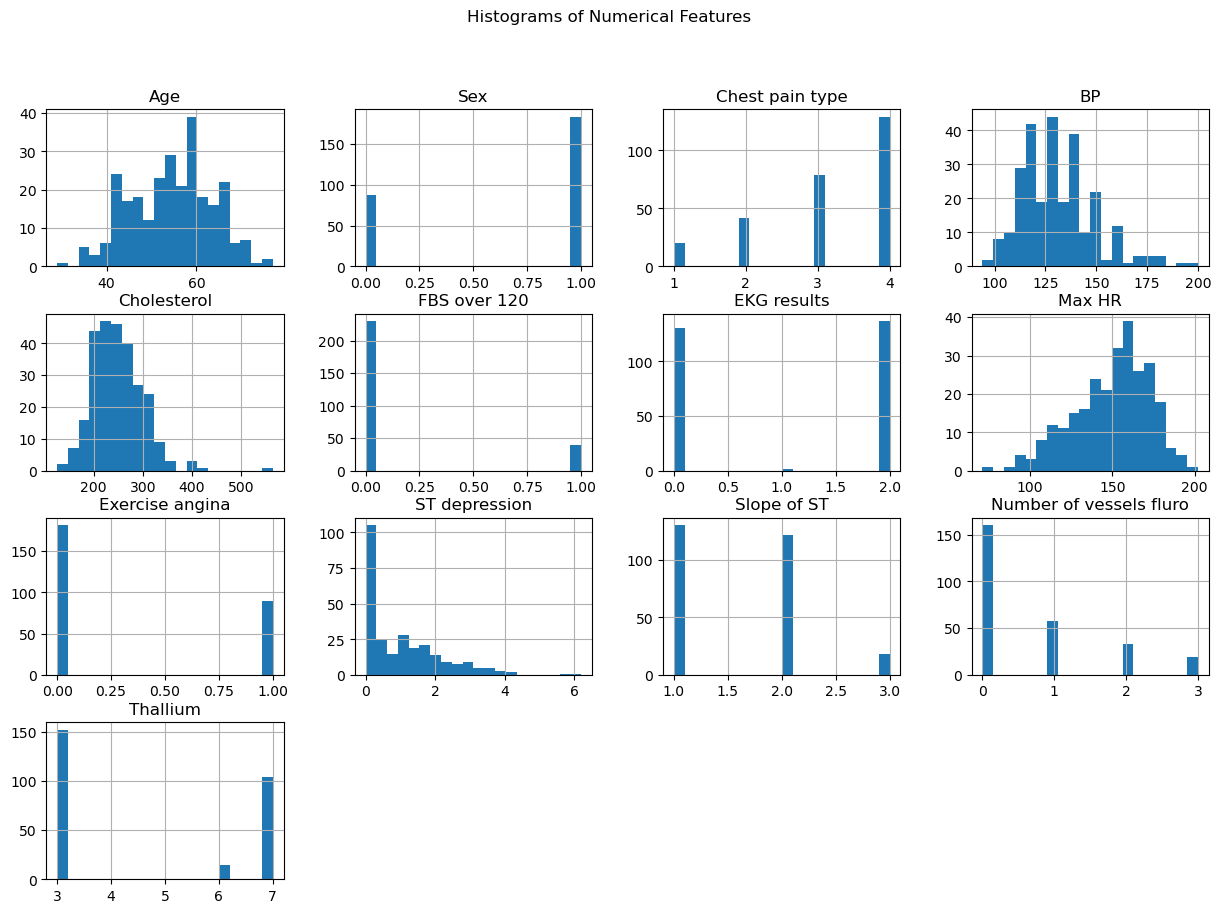

In [33]:
# Plot histograms for numerical features
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()



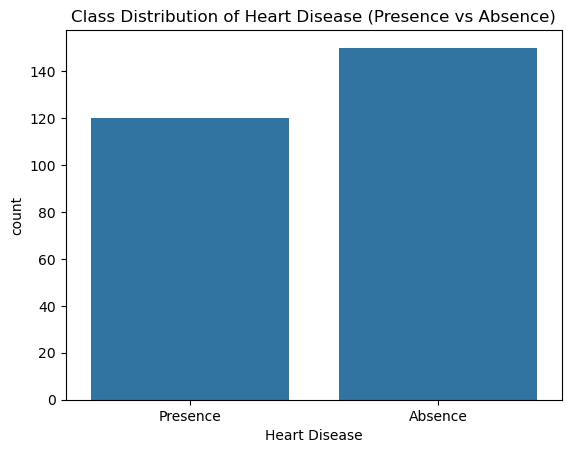

Heart Disease
Absence     55.555556
Presence    44.444444
Name: proportion, dtype: float64


In [34]:
# Count plot for the target variable to check for class imbalance
sns.countplot(x='Heart Disease', data=df)
plt.title('Class Distribution of Heart Disease (Presence vs Absence)')
plt.show()

# Display the percentage of each class in the target variable
print(df['Heart Disease'].value_counts(normalize=True) * 100)


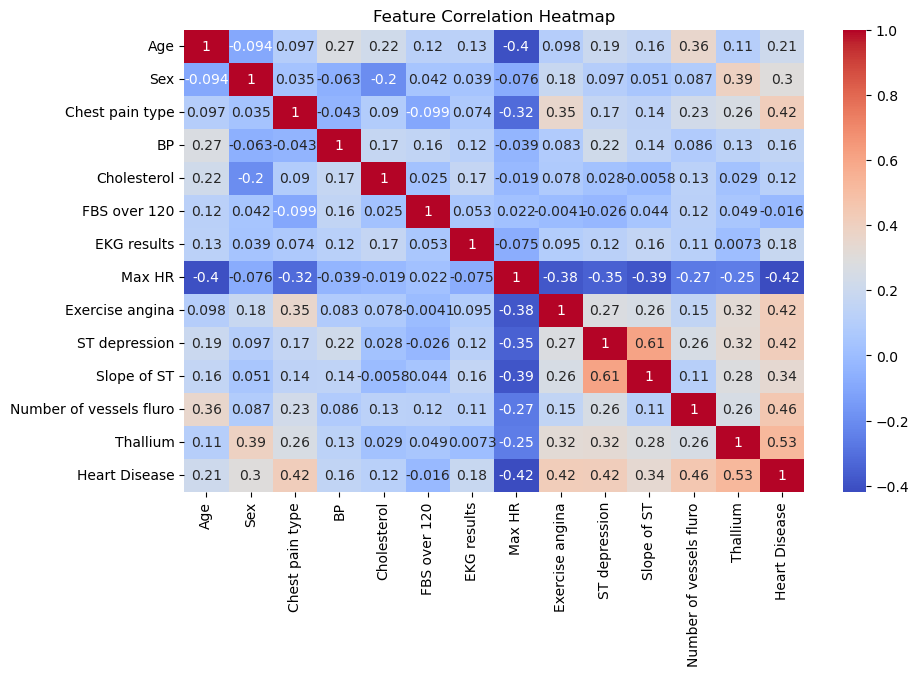

In [35]:
# Convert 'Heart Disease' column to 0 (Absence) and 1 (Presence)
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})

# Now you can run correlation on the whole dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [36]:
# One-hot encode multi-category columns
df_encoded = pd.get_dummies(df, columns=[
    'Chest pain type', 'EKG results', 'Slope of ST', 'Thallium'
], drop_first=True)  # drop_first=True avoids dummy variable trap

df_encoded.head()


,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression,Number of vessels fluro,Heart Disease,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_1,EKG results_2,Slope of ST_2,Slope of ST_3,Thallium_6,Thallium_7
0,70,1,130,322,0,109,0,2.4,3,1,False,False,True,False,True,True,False,False,False
1,67,0,115,564,0,160,0,1.6,0,0,False,True,False,False,True,True,False,False,True
2,57,1,124,261,0,141,0,0.3,0,1,True,False,False,False,False,False,False,False,True
3,64,1,128,263,0,105,1,0.2,1,0,False,False,True,False,False,True,False,False,True
4,74,0,120,269,0,121,1,0.2,1,0,True,False,False,False,True,False,False,False,False


In [37]:
X = df_encoded.drop('Heart Disease', axis=1)  # Features
y = df_encoded['Heart Disease']               # Target


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [42]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)


SVC(probability=True)

In [43]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt


In [51]:
svm_preds = svm_model.predict(X_test)
svm_probs = svm_model.predict_proba(X_test)[:, 1]

print("SVM F1 Score:", f1_score(y_test, svm_preds))
print("SVM AUC-ROC:", roc_auc_score(y_test, svm_probs))


SVM F1 Score: 0.7368421052631579
SVM AUC-ROC: 0.9076479076479076


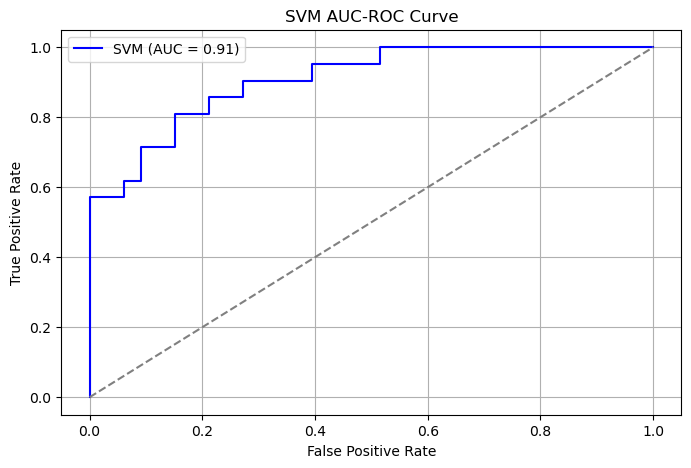

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
svm_probs = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)

# Compute AUC
auc_svm = roc_auc_score(y_test, svm_probs)

# Plot the curve
plt.figure(figsize=(8, 5))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("SVM AUC-ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


Actionable Insights for Healthcare Professionals:

Early Detection: Use the SVM model to screen individuals for heart disease risk based on medical records. High-risk individuals can be prioritized for further testing or preventive care.

Preventive Measures:

Lifestyle Recommendations: For those at high risk, suggest dietary changes, regular exercise, and weight management.

Medical Interventions: Consider prescribing medications such as statins or antihypertensive drugs for individuals at risk.

Feature Significance: Focus on key features like age, cholesterol, and blood pressure for targeted interventions and early detection.

These insights can help healthcare professionals prioritize patient care and take preventive steps to reduce the risk of heart disease.